#### MEDICAL COST REGRESSION

*Columns :*

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# importing dataset
data = pd.read_csv(r"D:\Coding_VSCODE\PYTHON\ML\Insurance\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
data.columns # display columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
print(data.isnull().sum().sum())
print(data.duplicated().sum().sum())

0
1


In [26]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='region', ylabel='charges'>

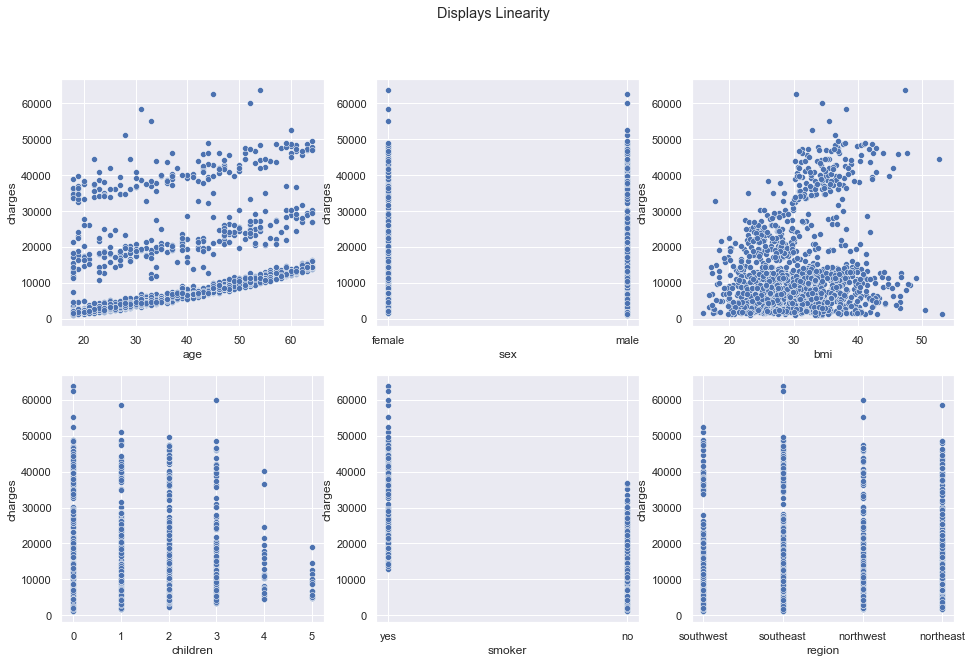

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plt.suptitle('Displays Linearity')
sns.scatterplot(data=data, ax=axes[0,0], y='charges', x='age')
sns.scatterplot(data=data, ax=axes[0,1], y='charges', x='sex')
sns.scatterplot(data=data, ax=axes[0,2], y='charges', x='bmi')
sns.scatterplot(data=data, ax=axes[1,0], y='charges', x='children')
sns.scatterplot(data=data, ax=axes[1,1], y='charges', x='smoker')
sns.scatterplot(data=data, ax=axes[1,2], y='charges', x='region')

<AxesSubplot:title={'center':'Region Counts'}, xlabel='region', ylabel='count'>

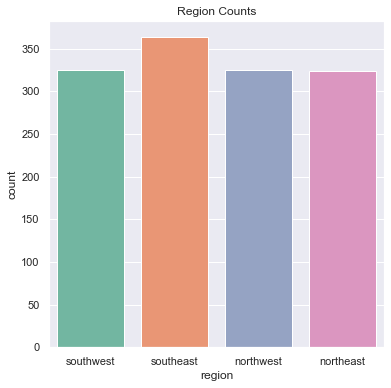

In [29]:
plt.figure(figsize=(6,6))
plt.title('Region Counts')
sns.set_theme(style='darkgrid')
sns.countplot(data=data, x='region', palette='Set2')

<AxesSubplot:title={'center':'Sex'}, xlabel='sex', ylabel='count'>

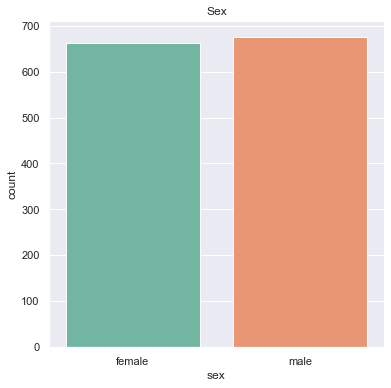

In [30]:
plt.figure(figsize=(6,6))
plt.title('Sex')
sns.set_theme(style='darkgrid')
sns.countplot(data=data, x='sex', palette='Set2')

<AxesSubplot:title={'center':'Smoking'}, xlabel='smoker', ylabel='count'>

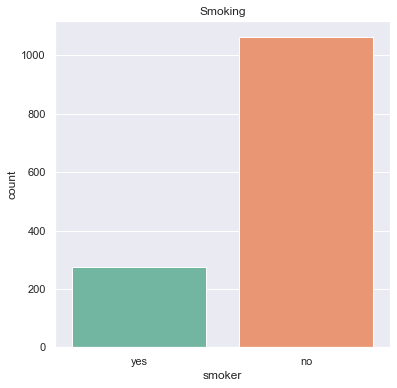

In [31]:
plt.figure(figsize=(6,6))
plt.title('Smoking')
sns.set_theme(style='darkgrid')
sns.countplot(data=data, x='smoker', palette='Set2')

In [32]:
# defining output
y = data['charges']
data.drop('charges', axis='columns', inplace=True)

In [33]:
# mapping yes and no in smoker column
yesOrNo = {'no' : 0, 'yes' : 1}
data['smoker'] = data['smoker'].map(yesOrNo)
data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,1,southwest
1,18,male,33.770,1,0,southeast
2,28,male,33.000,3,0,southeast
3,33,male,22.705,0,0,northwest
4,32,male,28.880,0,0,northwest


In [34]:
def make_column_labels(data):
    output = list()
    for i in range(len(data)):
        index = data[i]
        for j in range(len(index)):
            if len(index)>2:
                output.append(index[j])
            else :
                output.append(index[1])
                break
    return output

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num = data.select_dtypes(include='number')
num.drop('smoker', axis=1, inplace=True)
boolean_feature = data.smoker
cat = data.select_dtypes(exclude='number')

scale = StandardScaler()
scaled = scale.fit_transform(num)
scaled_num = pd.DataFrame(data=scaled, columns=num.columns, index=num.index)

encoder = OneHotEncoder(drop='if_binary', sparse=False)
encode = encoder.fit_transform(cat)
cat_encoded = pd.DataFrame(encode, columns=make_column_labels(encoder.categories_))

final_dataset = pd.concat([scaled_num, cat_encoded, boolean_feature], axis='columns')
final_dataset.head()

d:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,bmi,children,male,northeast,northwest,southeast,southwest,smoker
0,-1.438764,-0.453320,-0.908614,0.0,0.0,0.0,0.0,1.0,1
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,1.0,0.0,0
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,1.0,0.0,0
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0,0.0,0.0,0
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0,0.0,0.0,0


<AxesSubplot:title={'center':'Feature Correlations'}>

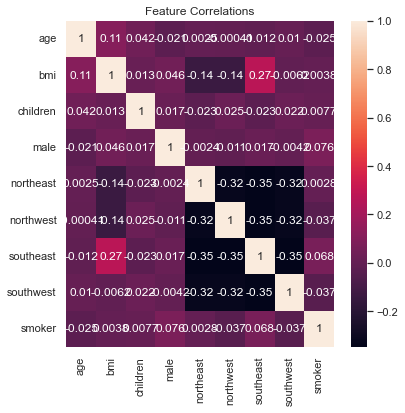

In [36]:
plt.figure(figsize=(6,6))
plt.title('Feature Correlations')
sns.set_theme(style='darkgrid')
sns.heatmap(data=final_dataset.corr(), annot=True)

In [37]:
# splitting data

from sklearn.model_selection import train_test_split
X = final_dataset
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [38]:
# building model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# prediction
y_predict = reg.predict(X_test)

In [43]:
# score
print(f'Model score : {round((reg.score(X_test, y_test)*100),2)}%')

Model score : 76.24%
